<a href="https://colab.research.google.com/github/vahadruya/Capstone_Regression_NYC_Taxi_Trip_Duration_Prediction/blob/main/Iterations_Notebooks_and_Results/PWHS_1001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Iteration 5 - In this notebook, the **passenger_count** and **store_and_fwd_flag** features have been included while **extreme_weather** and **holiday** features have been dropped.

## Initial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/ALMA BETTER/Module 4/#CAPSTONE 1 - REGRESSION/Input data/'
df = pd.read_csv('NYC Taxi Data.csv', parse_dates = ['pickup_datetime', 'dropoff_datetime'])

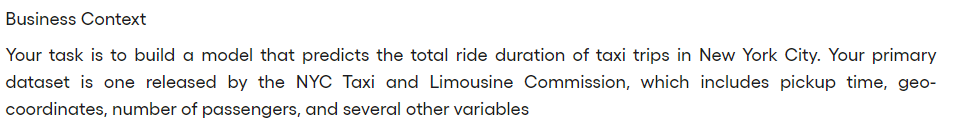

![image](https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/Regression_NYC_Taxi_Trip_Time_Prediction_91a23744ad.png)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
data = df.copy()

## Columns

### Dropoff datetime, ID

In [ ]:
((data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds() - data['trip_duration']).value_counts()

0.000000e+00    1220647
1.136868e-13      82271
5.684342e-14      79253
2.842171e-14      33925
2.273737e-13      29992
1.421085e-14       6808
4.547474e-13       4090
7.105427e-15       1021
3.552714e-15        383
1.776357e-15        148
9.094947e-13         65
7.275958e-12         20
3.637979e-12         15
1.818989e-12          4
2.328306e-10          2
dtype: int64

In [ ]:
data['id'].nunique()

1458644

In [ ]:
data = data.drop(['id', 'dropoff_datetime'], axis = 1)

### Pickup, Dropoff coordinates

In [ ]:
# Containing within the box of nYC

data = data[
    data['pickup_latitude'].between(40.46, 40.93) &
    data['dropoff_latitude'].between(40.46, 40.93) &
    data['pickup_longitude'].between(-74.3, -73.65) &
    data['dropoff_longitude'].between(-74.3, -73.65)
]

### Pickup datetime -> other variables

In [ ]:
data['day_of_week'] = data['pickup_datetime'].dt.weekday

In [ ]:
data['day_of_month'] = data['pickup_datetime'].dt.day

In [ ]:
data['month'] = data['pickup_datetime'].dt.month

In [ ]:
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [ ]:
data = data.drop(['pickup_datetime'], axis = 1)

### passenger count

In [ ]:
data['passenger_count'].value_counts()

1    1032787
2     210176
5      78058
3      59862
6      48322
4      28378
0         60
7          2
9          1
8          1
Name: passenger_count, dtype: int64

In [ ]:
data = data[~data['passenger_count'].isin([0, 7, 8, 9])]

### Store_and_fwd_flag

In [ ]:
data['store_and_fwd_flag'].value_counts()

N    1449562
Y       8021
Name: store_and_fwd_flag, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

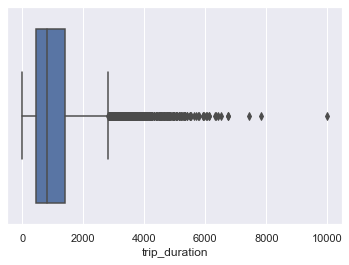

In [ ]:
sns.boxplot(data[data['store_and_fwd_flag'] == 'Y']['trip_duration'].reset_index(drop = True))

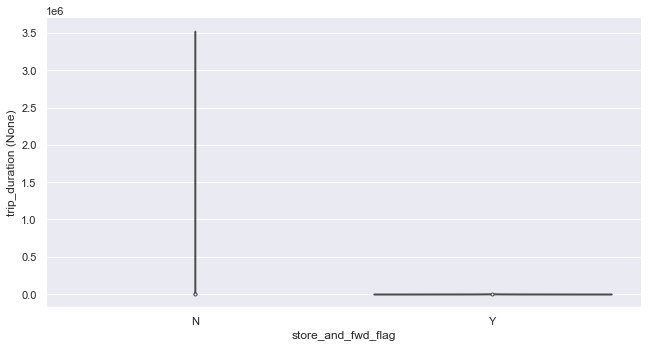

In [ ]:
def catplot_with_median(dataset, variable, legend, median = False, unit = None, kind_ = 'violin'):
  ''' Returns a categorical plot with median. Inputs: Dataframe dataset, continuous variable to plot,
  the discrete variable to legend on, median (True/False), unit and type of plot'''

  sns.catplot(data = dataset, x = legend, y = variable, height = 5, aspect = 11/6, kind = kind_)
  plt.ylabel(variable + f' ({unit})')
  if median == True:
    colour = ['green', 'red', 'yellow', 'pink']
    i = 0
    for value in dataset.dropna()[legend].unique():
      plt.axhline(dataset[dataset[legend] == value][variable].median(), color = colour[i], linestyle = '--', label = f"Median ({legend} = {value}) = {dataset[dataset[legend] == value][variable].median():.2f} {unit}")
      i+=1
    plt.legend(bbox_to_anchor=(1, 0.54))
  plt.show()

catplot_with_median(dataset = data, variable = 'trip_duration', legend = 'store_and_fwd_flag')

In [ ]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'N':0, 'Y':1})

### distance and trip_duration

In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine
data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,day_of_month,month,hour_of_day
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,14,3,17
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,12,6,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,19,1,11
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2,6,4,19
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,5,26,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,4,8,4,13
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,6,10,1,7
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,0,764,4,22,4,6
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,1,5,1,15


In [ ]:
def calculate_distance(row):
    coords1 = (row['pickup_latitude'], row['pickup_longitude'])
    coords2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(coords1, coords2)

In [ ]:
data['distance'] =  data.apply(lambda x: calculate_distance(x), axis=1)

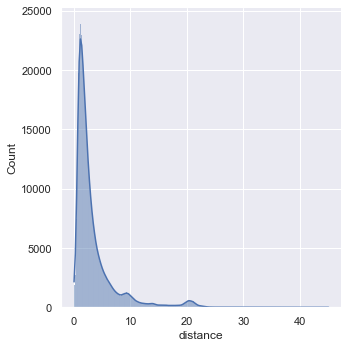

In [ ]:
sns.displot(data['distance'], kde = True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

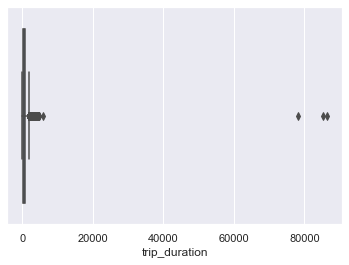

In [ ]:
sns.boxplot(data[data['distance'] == 0]['trip_duration'].reset_index(drop = True))

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance'>

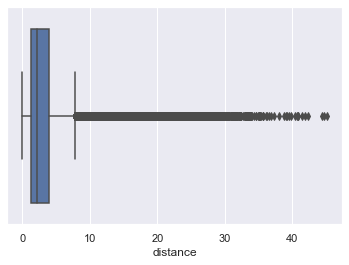

In [ ]:
sns.boxplot(data['distance'])

In [ ]:
td_iqr = data['trip_duration'].quantile(0.75) - data['trip_duration'].quantile(0.25)
max_q3 = data['trip_duration'].quantile(0.75) + 1.5*td_iqr
max_q3

2089.5

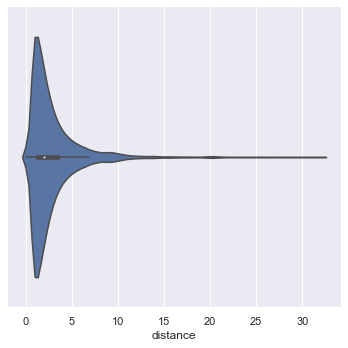

In [ ]:
sns.catplot(data = data[data['trip_duration'] <= max_q3], x = 'distance', kind = 'violin')

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

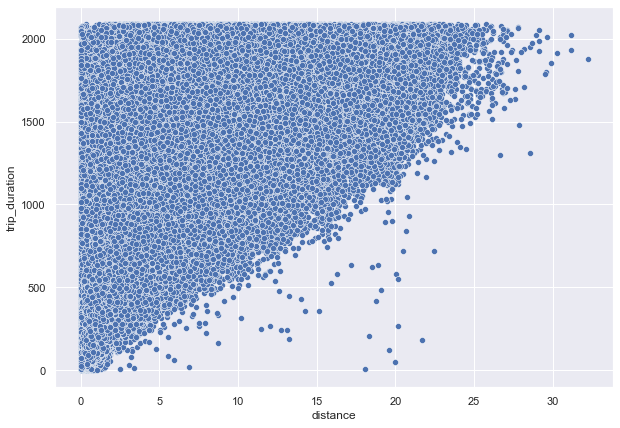

In [ ]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'distance', y = 'trip_duration', data = data[(data['trip_duration'] <= max_q3) & (data['distance'] != 0)])

In [ ]:
dat1 = data[(data['trip_duration'] <= max_q3) & (data['distance'] != 0)]
dat2 = data[data['trip_duration'] <= max_q3]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance'>

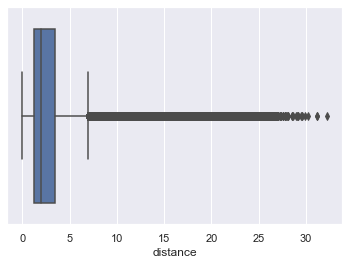

In [ ]:
sns.boxplot(dat2['distance'])

## Variable transformation and scaling

### transform

In [ ]:
dat1t = dat1.copy()
dat2t = dat2.copy()

In [ ]:
dat1t['trip_duration'] = np.sqrt(dat1t['trip_duration'])
dat2t['trip_duration'] = np.sqrt(dat2t['trip_duration'])

In [ ]:
dat1t['distance'] = np.sqrt(dat1t['distance'])
dat2t['distance'] = np.sqrt(dat2t['distance'])

### split

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
X1 = dat1.drop('trip_duration', axis = 1)
Y1 = dat1['trip_duration']

X2 = dat2.drop('trip_duration', axis = 1)
Y2 = dat2['trip_duration']

X1t = dat1t.drop('trip_duration', axis = 1)
Y1t = dat1t['trip_duration']

X2t = dat2t.drop('trip_duration', axis = 1)
Y2t = dat2t['trip_duration']

In [ ]:
rs = 8

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = rs)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = rs)

X1t_train, X1t_test, Y1t_train, Y1t_test = train_test_split(X1t, Y1t, test_size = 0.2, random_state = rs)

X2t_train, X2t_test, Y2t_train, Y2t_test = train_test_split(X2t, Y2t, test_size = 0.2, random_state = rs)

### scaling

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler1 = StandardScaler()
X1s_train = scaler1.fit_transform(X1_train)
X1s_test = scaler1.transform(X1_test)

scaler2 = StandardScaler()
X2s_train = scaler2.fit_transform(X2_train)
X2s_test = scaler2.transform(X2_test)

scaler1t = StandardScaler()
X1ts_train = scaler1t.fit_transform(X1t_train)
X1ts_test = scaler1t.transform(X1t_test)

scaler2t = StandardScaler()
X2ts_train = scaler2t.fit_transform(X2t_train)
X2ts_test = scaler2t.transform(X2t_test)

## reference - datacouples

In [ ]:
# # Couples:

# (X1_train, Y1_train)
# (X2_train, Y2_train)
# (X1t_train, Y1t_train)
# (X2t_train, Y2t_train)

# (X1s_train, Y1_train)
# (X2s_train, Y2_train)
# (X1ts_train, Y1t_train)
# (X2ts_train, Y2t_train)

In [ ]:
input_names = {'s1': [X1_train, X1_test, Y1_train, Y1_test],
               's2': [X2_train, X2_test, Y2_train, Y2_test],
               's1t': [X1t_train, X1t_test, Y1t_train, Y1t_test],
               's2t': [X2t_train, X2t_test, Y2t_train, Y2t_test],
               's1s':[X1s_train, X1s_test, Y1_train, Y1_test],
               's2s':[X2s_train, X2s_test, Y2_train, Y2_test],
               's1ts': [X1ts_train, X1ts_test, Y1t_train, Y1t_test],
               's2ts': [X2ts_train, X2ts_test, Y2t_train, Y2t_test]}

## Model implementation

In [ ]:
sns.set()

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def evaluate_model(y_true, y_pred, X_true):
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r2 = r2_score(y_true, y_pred)
  adj_r2 = 1 - (1 - r2) * ((X_true.shape[0] - 1) / (X_true.shape[0] - X_true.shape[1] - 1))
  return mse, rmse, r2, adj_r2

In [ ]:
score_names = ['mse_train', 'rmse_train', 'r2_train', 'adj_r2_train', 'mse_test', 'rmse_test', 'r2_test', 'adj_r2_test']
scores = dict()
for x in input_names:
  scores[x] = {'mse_train':[], 'rmse_train':[], 'r2_train':[], 'adj_r2_train':[], 'mse_test':[], 'rmse_test':[], 'r2_test':[], 'adj_r2_test':[]}

### 1. linear regression

In [ ]:
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  reg = LinearRegression()
  reg.fit(X_train, Y_train)
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1:
Train scores = (99818.61080110115, 315.94083433627435, 0.5008032370898652, 0.5007978028522818)
Test scores = (99865.16601996575, 316.0145028633429, 0.5002293504974382, 0.5002075878274064)

Iteration s2:
Train scores = (100508.84445219167, 317.03129885263957, 0.49802883755772864, 0.49802339546241114)
Test scores = (99950.4600003539, 316.1494266962284, 0.5012830842690563, 0.5012614563269053)

Iteration s1t:
Train scores = (28.382061468846413, 5.327481719240941, 0.5808733133887154, 0.5808687507910348)
Test scores = (28.345811599282293, 5.324078474185208, 0.5811830066063757, 0.5811647690887463)

Iteration s2t:
Train scores = (29.10313834668261, 5.394732462938511, 0.5733096772126378, 0.5733050512707882)
Test scores = (28.937387649962336, 5.379348255129272, 0.5758591738777713, 0.5758407800897086)

Iteration s1s:
Train scores = (99818.61080110101, 315.9408343362741, 0.500803237089866, 0.5007978028522826)
Test scores = (99865.16601996559, 316.0145028633426, 0.500229350497439, 0.5

In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 0
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

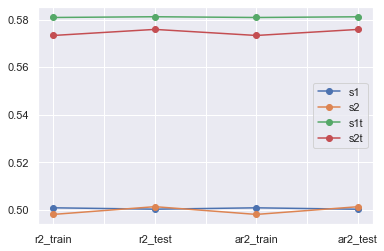

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t,s1s,s2s,s1ts,s2ts
r2_train,0.500803,0.498029,0.580873,0.573310,0.500803,0.498029,0.580873,0.573310
r2_test,0.500229,0.501283,0.581183,0.575859,0.500229,0.501283,0.581183,0.575859
ar2_train,0.500798,0.498023,0.580869,0.573305,0.500798,0.498023,0.580869,0.573305
ar2_test,0.500208,0.501261,0.581165,0.575841,0.500208,0.501261,0.581165,0.575841


### 2. Decision tree

In [ ]:
param_dt = {'max_depth' : [20, 25], 'min_samples_split' : [40, 60, 80]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]
  dt = DecisionTreeRegressor()
  dt_grid = GridSearchCV(estimator = dt, param_grid = param_dt, cv = 5, scoring = 'r2')
  dt_grid.fit(X_train, Y_train)

  reg = dt_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {dt_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (42639.15363290945, 206.49250260701828, 0.7867599308791272, 0.786757609555585)
Test scores = (56123.57146794749, 236.90413982863933, 0.7191321570593311, 0.7191199265808215)

Iteration s2:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (43473.832572250074, 208.50379510275124, 0.7828787069331669, 0.7828763530234989)
Test scores = (56864.71567538632, 238.46323757633232, 0.7162654817652135, 0.7162531770016232)

Iteration s1t:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (13.934447599992232, 3.732887300735482, 0.7942256992588815, 0.7942234592074191)
Test scores = (18.136208271769902, 4.258662732803562, 0.7320326428707522, 0.7320209741479524)

Iteration s2t:
Best params = {'max_depth': 20, 'min_samples_split': 80}
Train scores = (14.234464060098777, 3.7728588709490283, 0.7913040170390773, 0.7913017544719885)
Test scores = (18.539223621770308, 4.30571987265

In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 1
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

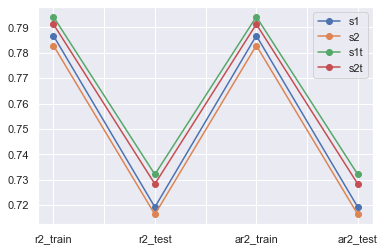

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t,s1s,s2s,s1ts,s2ts
r2_train,0.786760,0.782879,0.794226,0.791304,0.786760,0.782878,0.794226,0.791314
r2_test,0.719132,0.716265,0.732033,0.728267,0.719092,0.716197,0.731980,0.728413
ar2_train,0.786758,0.782876,0.794223,0.791302,0.786758,0.782876,0.794223,0.791311
ar2_test,0.719120,0.716253,0.732021,0.728255,0.719080,0.716185,0.731969,0.728401


### 3. Polynomial regression

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
    X_train, X_test, Y_train, Y_test = input_names[input]

    poly_reg = PolynomialFeatures(degree = 2)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)

    reg = LinearRegression()
    reg.fit(X_train_poly, Y_train)

    Y_train_pred = reg.predict(X_train_poly)
    Y_test_pred = reg.predict(X_test_poly)

    train_scores = evaluate_model(Y_train, Y_train_pred, X_train_poly)
    test_scores = evaluate_model(Y_test, Y_test_pred, X_test_poly)
    print(f'Iteration {input}:')
    print(f'Train scores = {train_scores}')
    print(f'Test scores = {test_scores}\n')

    for i, score in enumerate(score_names):
        if 'train' in score:
            scores[input][score].append(train_scores[i])
        elif 'test' in score:
            scores[input][score].append(test_scores[i-4])

Iteration s1:
Train scores = (73858.78315117511, 271.7697244933201, 0.6306293469159211, 0.6305988524859141)
Test scores = (73871.16394818535, 271.7925016408388, 0.6303151433352268, 0.63019303150073)

Iteration s2:
Train scores = (74910.1923822463, 273.69726411173036, 0.6258761449916321, 0.6258453844540695)
Test scores = (74595.29613452095, 273.12139450164085, 0.6277962501011707, 0.6276738093459298)

Iteration s1t:
Train scores = (23.40526234504837, 4.837898546378208, 0.6543672464836394, 0.6543387118024939)
Test scores = (23.330100827355782, 4.830124307650454, 0.655291482840073, 0.6551776210233441)

Iteration s2t:
Train scores = (24.46252618482707, 4.945960592728886, 0.6413471609261016, 0.6413176724185375)
Test scores = (24.399843834499837, 4.939619806675392, 0.6423668215526843, 0.6422491739564948)

Iteration s1s:
Train scores = (73854.76032995334, 271.76232323475847, 0.6306494652016352, 0.6306189724325497)
Test scores = (73868.43596052274, 271.78748308287254, 0.6303287954245419, 0.6302

In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 2
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

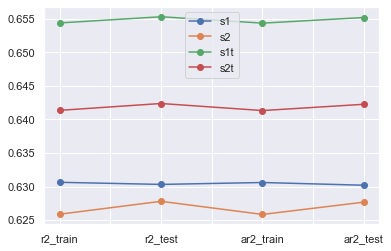

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t,s1s,s2s,s1ts,s2ts
r2_train,0.630629,0.625876,0.654367,0.641347,0.630649,0.625876,0.654375,0.641347
r2_test,0.630315,0.627796,0.655291,0.642367,0.630329,0.627796,0.655309,0.642367
ar2_train,0.630599,0.625845,0.654339,0.641318,0.630619,0.625845,0.654347,0.641318
ar2_test,0.630193,0.627674,0.655178,0.642249,0.630207,0.627674,0.655195,0.642249


### 4. Lasso

In [ ]:
param_lasso = {'alpha' : [0.00001, 0.001, 0.1, 1]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  lasso = Lasso()
  lasso_grid = GridSearchCV(estimator = lasso, param_grid = param_lasso, cv = 5, scoring = 'r2')
  lasso_grid.fit(X_train, Y_train)

  reg = lasso_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {lasso_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1:
Best params = {'alpha': 1e-05}
Train scores = (99818.61080189396, 315.940834337529, 0.5008032370859004, 0.5007978028483169)
Test scores = (99865.16843789193, 316.01450668899986, 0.5002293383970373, 0.5002075757264786)

Iteration s2:
Best params = {'alpha': 1e-05}
Train scores = (100508.84445297254, 317.03129885387114, 0.49802883755382876, 0.49802339545851126)
Test scores = (99950.46368177937, 316.1494325185155, 0.5012830659000649, 0.5012614379571174)

Iteration s1t:
Best params = {'alpha': 1e-05}
Train scores = (28.382062232527204, 5.3274817909146535, 0.5808733021112048, 0.5808687395134016)
Test scores = (28.34583346674031, 5.32408052782265, 0.5811826835087995, 0.5811644459771007)

Iteration s2t:
Best params = {'alpha': 1e-05}
Train scores = (29.10313910235598, 5.394732532976587, 0.5733096661334715, 0.5733050401915017)
Test scores = (28.937430670459634, 5.3793522537996745, 0.5758585433181131, 0.5758401495027049)

Iteration s1s:
Best params = {'alpha': 1e-05}
Train scores 

In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 3
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

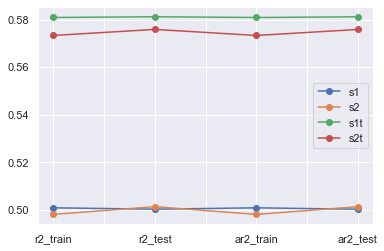

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t,s1s,s2s,s1ts,s2ts
r2_train,0.500803,0.498029,0.580873,0.573310,0.500803,0.498029,0.580873,0.573310
r2_test,0.500229,0.501283,0.581183,0.575859,0.500229,0.501283,0.581183,0.575859
ar2_train,0.500798,0.498023,0.580869,0.573305,0.500798,0.498023,0.580869,0.573305
ar2_test,0.500208,0.501261,0.581164,0.575840,0.500208,0.501261,0.581165,0.575841


### 5. Ridge

In [ ]:
param_ridge = {'alpha' : [0.000001, 0.00001, 0.001, 0.1, 1, 10]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  ridge = Ridge()
  ridge_grid = GridSearchCV(estimator = ridge, param_grid = param_ridge, cv = 5, scoring = 'r2')
  ridge_grid.fit(X_train, Y_train)

  reg = ridge_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {lasso_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1:
Best params = {'alpha': 1e-05}
Train scores = (99818.61089597101, 315.940834486413, 0.5008032366154174, 0.5007978023778288)
Test scores = (99865.20486441896, 316.01456432325864, 0.500229156102151, 0.5002073934236542)

Iteration s2:
Best params = {'alpha': 1e-05}
Train scores = (100508.84454361217, 317.0312989968217, 0.4980288371011474, 0.49802339500582504)
Test scores = (99950.49248276283, 316.1494780681487, 0.5012829221934961, 0.5012612942443164)

Iteration s1t:
Best params = {'alpha': 1e-05}
Train scores = (28.382061487294575, 5.327481720972356, 0.5808733131162858, 0.5808687505186023)
Test scores = (28.345815605407573, 5.3240788504123016, 0.5811829474147967, 0.5811647098945898)

Iteration s2t:
Best params = {'alpha': 1e-05}
Train scores = (29.10313836323419, 5.394732464472561, 0.5733096769699699, 0.5733050510281177)
Test scores = (28.937393277790893, 5.379348778225008, 0.5758590913896116, 0.5758406975979716)

Iteration s1s:
Best params = {'alpha': 1e-05}
Train scores = 

In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 4
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

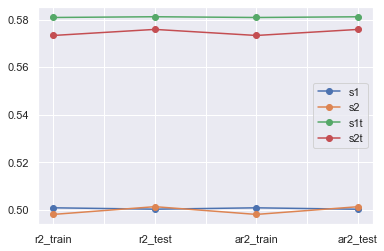

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t,s1s,s2s,s1ts,s2ts
r2_train,0.500803,0.498029,0.580873,0.573310,0.500803,0.498029,0.580873,0.573310
r2_test,0.500229,0.501283,0.581183,0.575859,0.500229,0.501283,0.581183,0.575859
ar2_train,0.500798,0.498023,0.580869,0.573305,0.500798,0.498023,0.580869,0.573305
ar2_test,0.500207,0.501261,0.581165,0.575841,0.500208,0.501261,0.581165,0.575841


### 6. ELastic Net

In [ ]:
param_elastic = {'alpha' : [0.00001, 0.001, 0.1, 10], 'l1_ratio' : [0.1, 0.5, 0.9]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]

  elastic = ElasticNet()
  elastic_grid = GridSearchCV(estimator = elastic, param_grid = param_elastic, cv = 5, scoring = 'r2')
  elastic_grid.fit(X_train, Y_train)

  reg = elastic_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {elastic_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.9}
Train scores = (99818.62244110637, 315.94085275745266, 0.5008031788777454, 0.5007977446395283)
Test scores = (99865.60578208616, 316.01519865678324, 0.5002271497280477, 0.5002053869621826)

Iteration s2:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.9}
Train scores = (100508.8557599482, 317.03131668645636, 0.4980287810834182, 0.4980233389874885)
Test scores = (99950.83247961168, 316.1500157830325, 0.5012812257312707, 0.5012595977085201)

Iteration s1t:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.9}
Train scores = (28.382066585587395, 5.327482199462275, 0.5808732378282175, 0.5808686752297145)
Test scores = (28.345879480231144, 5.324084849082624, 0.5811820036470916, 0.581163766085788)

Iteration s2t:
Best params = {'alpha': 1e-05, 'l1_ratio': 0.9}
Train scores = (29.103143126251418, 5.394732905923278, 0.5733096071378667, 0.5733049811952574)
Test scores = (28.937492406771764, 5.379357992062971, 0.575857638437177, 0.575839244582

In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 5
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<Axes: >

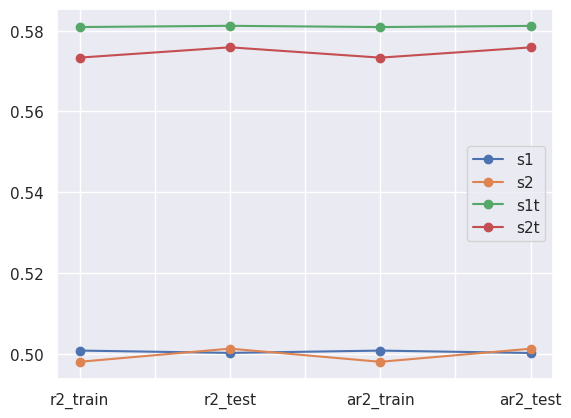

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t,s1s,s2s,s1ts,s2ts
r2_train,0.500803,0.498029,0.580873,0.573310,0.500803,0.498029,0.580873,0.573310
r2_test,0.500227,0.501281,0.581182,0.575858,0.500229,0.501283,0.581183,0.575859
ar2_train,0.500798,0.498023,0.580869,0.573305,0.500798,0.498023,0.580869,0.573305
ar2_test,0.500205,0.501260,0.581164,0.575839,0.500208,0.501261,0.581165,0.575841


### 7. XGBoost

In [ ]:
# param_xg = {'max_depth' : [20, 25], 'learning_rate' : [0.01, 0.1, 0.3], 'n_estimators' : [50, 100, 150]}

param_xg = {'max_depth' : [15], 'learning_rate' : [0.1], 'n_estimators' : [80, 100]}

In [ ]:
%%time
# input_names_ = {'s1': [X1_train, X1_test, Y1_train, Y1_test]}

for input in input_names:
  X_train, X_test, Y_train, Y_test = input_names[input]
  xg = xgb.XGBRegressor()
  xg_grid = GridSearchCV(estimator = xg, param_grid = param_xg, cv = 5, scoring = 'r2', n_jobs = 3)
  xg_grid.fit(X_train, Y_train)

  reg = xg_grid.best_estimator_
  Y_train_pred = reg.predict(X_train)
  Y_test_pred = reg.predict(X_test)

  train_scores = evaluate_model(Y_train, Y_train_pred, X_train)
  test_scores = evaluate_model(Y_test, Y_test_pred, X_test)
  print(f'Iteration {input}:')
  print(f'Best params = {xg_grid.best_params_}')
  print(f'Train scores = {train_scores}')
  print(f'Test scores = {test_scores}\n')

  for i, score in enumerate(score_names):
    if 'train' in score:
      scores[input][score].append(train_scores[i])
    elif 'test' in score:
      scores[input][score].append(test_scores[i-4])

Iteration s1:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (17185.15128871975, 131.09214808187312, 0.9140563886373463, 0.914055453058357)
Test scores = (39874.550178529906, 199.6861291590628, 0.8004496398938323, 0.8004409504106743)

Iteration s2:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (17881.828910030006, 133.7229558080063, 0.9106928102349121, 0.9106918420154693)
Test scores = (40577.199637184945, 201.43783070015658, 0.7975343399921923, 0.7975255596291364)

Iteration s1t:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (5.94430382949715, 2.438094302831035, 0.9122186254510577, 0.912217669866246)
Test scores = (12.828545889939221, 3.581695951632302, 0.8104547826962725, 0.8104465288902027)

Iteration s2t:
Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Train scores = (5.983698648993738, 2.4461599802534866, 0.9122711001958841, 

In [ ]:
# Best params = {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 80}
# Train scores = (18696.025470614226, 136.733410220817, 0.9065004479694372, 0.9064994301367559)
# Test scores = (40295.50115847913, 200.73739352317776, 0.7983430099943146, 0.7983342287772954)

# CPU times: total: 10min 40s
# Wall time: 22min 14s

In [ ]:
r2s = {'r2_train':[], 'r2_test':[], 'ar2_train':[], 'ar2_test':[]}
model_no = 6
for input in input_names:
  r2s['r2_train'].append(scores[input]['r2_train'][model_no])
  r2s['r2_test'].append(scores[input]['r2_test'][model_no])
  r2s['ar2_train'].append(scores[input]['adj_r2_train'][model_no])
  r2s['ar2_test'].append(scores[input]['adj_r2_test'][model_no])
r2s_df = pd.DataFrame(r2s, index = input_names.keys())

<AxesSubplot:>

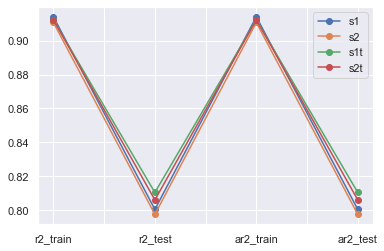

In [ ]:
r2s_df.T.iloc[:,:4].plot(marker = 'o')

In [ ]:
r2s_df.T

,s1,s2,s1t,s2t,s1s,s2s,s1ts,s2ts
r2_train,0.914056,0.910693,0.912219,0.912271,0.911841,0.911172,0.910857,0.913917
r2_test,0.800450,0.797534,0.810455,0.806059,0.799580,0.798504,0.810605,0.806438
ar2_train,0.914055,0.910692,0.912218,0.912270,0.911840,0.911171,0.910856,0.913916
ar2_test,0.800441,0.797526,0.810447,0.806051,0.799571,0.798495,0.810596,0.806429


### pickle

In [ ]:
import pickle

with open('scores.pkl', 'wb') as f:
    pickle.dump(scores, f)

# with open('scores.pkl', 'rb') as f:
#     scores = pickle.load(f)

{'s1': {'mse_train': [99818.61080110115,
   42639.15363290945,
   73858.78315117511,
   99818.61080189396,
   99818.61089597101,
   99818.62244110637,
   17185.15128871975],
  'rmse_train': [315.94083433627435,
   206.49250260701828,
   271.7697244933201,
   315.940834337529,
   315.940834486413,
   315.94085275745266,
   131.09214808187312],
  'r2_train': [0.5008032370898652,
   0.7867599308791272,
   0.6306293469159211,
   0.5008032370859004,
   0.5008032366154174,
   0.5008031788777454,
   0.9140563886373463],
  'adj_r2_train': [0.5007978028522818,
   0.786757609555585,
   0.6305988524859141,
   0.5007978028483169,
   0.5007978023778288,
   0.5007977446395283,
   0.914055453058357],
  'mse_test': [99865.16601996575,
   56123.57146794749,
   73871.16394818535,
   99865.16843789193,
   99865.20486441896,
   99865.60578208616,
   39874.550178529906],
  'rmse_test': [316.0145028633429,
   236.90413982863933,
   271.7925016408388,
   316.01450668899986,
   316.01456432325864,
   316.0151